# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [108]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [ ]:
# Load the dataset
file_path = 'data/games.csv'
df = pd.read_csv(file_path)

In [110]:
# Display basic information about the dataset
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [111]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

**1. Total number of records:**
There are 167715 rows in the dataset.

**2. Data types in each column:**
The are either object or float64 values.

**3. Obvious issues in the data:**
- Missing values in several columns (Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating).

**4. Immediate patterns or anomalies:**
- Certain columns like year, are in float from and should be in int form.
- It seems that the years in the 1900s there are no ratings or scores provided.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [112]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [113]:
# Verify the changes
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [114]:
# Check current data types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [115]:
# Make changes to data types if necessary
# Convert year_of_release to integer (nullable Int64 to handle NaNs)
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Confirm changes
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

### Data Type Adjustments
- year_of_release: Originally float64, which is not appropriate. I converted it to type Int64 this should allow easyer handeling of the scores.

In [116]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
# Replace 'tbd' in user_score with NaN and convert to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Confirm changes
print(df['user_score'])

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64


### 2.3 Handling Missing Values

In [117]:
# Examine missing values
missing_values = df.isna().sum()
print(missing_values)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [118]:
# Calculate percentage of missing values
missing_percent = (missing_values / len(df)) * 100
print(missing_percent.round(2))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64


In [119]:
# Analyze patterns in missing values
# Explore if missing critic_score or user_score is tied to certain years
missing_by_year = df[df['critic_score'].isna()].groupby('year_of_release')['name'].count()

print("Missing critic_score by year:")
print(missing_by_year.sort_values(ascending=False))

# Explore missing ratings by platform
missing_rating_by_platform = df[df['rating'].isna()].groupby('platform')['name'].count()

print("\nMissing rating by platform:")
print(missing_rating_by_platform.sort_values(ascending=False))

Missing critic_score by year:
year_of_release
2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: name, dtype: int64

Missing rating by platform:
platform
PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
NES      98
GB       98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: name, dtype: int64


In [120]:
# looking into the 2 missing name values
print(df[df['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [121]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
# Drop rows with missing year_of_release since it's essential for time-based analysis
df = df.dropna(subset=['year_of_release'])

# Fill missing ESRB ratings with 'Unrated' to allow grouping
df['rating'] = df['rating'].fillna('Unrated')

# Removing the rows with no name
df = df.dropna(subset=['name'])

### Why Are Values Missing?
Missing values are likely due to incomplete or incorrect data entries. for the relase year it seams to be just incomplet. For the user and cruic scores could be just because the game didn't get reviewed, and for the ratings most of them are for old or international games so they probably didn't get official ESRB ratings. The name and genre values are of the same row and seem to only have no usful data, maybe they where put in on acident. 

### Fixes
- Dropped missing year_of_release and name/genre rows: I fugired for the taks we will be doing the years are very important as are the genres.
- Filled missing ratings with Unrated: So I can still group and analyze all games by rating.
- Left critic_scor and user_score as NaN: This shouldn't effect much of the data 

### 2.4 Calculate Total Sales

In [122]:
# Calculate total sales across all regions and put them in a different column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Preview the new column
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  Unrated   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  Unrated   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [123]:
# Create a DataFrame with game releases by year
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'game_count']

# Preview the result
games_per_year.head()

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


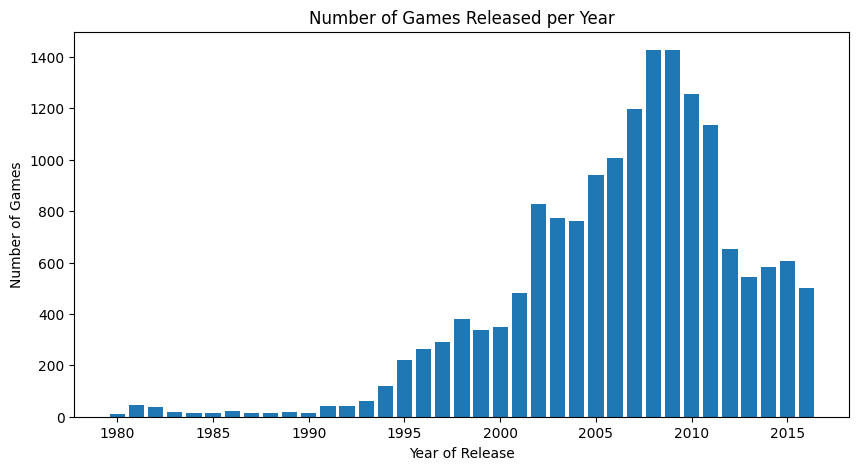

In [124]:
# Visualize the distribution of games across years
plt.figure(figsize=(10, 5))
plt.bar(games_per_year['year_of_release'], games_per_year['game_count'])
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

In [125]:
# Display summary statistics for each year
# Group by year and calculate summary statistics
yearly_stats = df.groupby('year_of_release').agg({
    'total_sales': ['count', 'sum', 'mean'],
    'critic_score': ['mean'],
    'user_score': ['mean']
})

# Round for readability
yearly_stats = yearly_stats.round(2)

# Display the summary statistics
yearly_stats

total_sales               critic_score user_score
                      count     sum  mean         mean       mean
year_of_release                                                  
1980                      9   11.38  1.26          NaN        NaN
1981                     46   35.68  0.78          NaN        NaN
1982                     36   28.88  0.80          NaN        NaN
1983                     17   16.80  0.99          NaN        NaN
1984                     14   50.35  3.60          NaN        NaN
1985                     14   53.95  3.85        59.00       5.80
1986                     21   37.08  1.77          NaN        NaN
1987                     16   21.70  1.36          NaN        NaN
1988                     15   47.21  3.15        64.00       2.20
1989                     17   73.45  4.32          NaN        NaN
1990                     16   49.37  3.09          NaN        NaN
1991                     41   32.23  0.79          NaN        NaN
1992                     43   76.16  1.77        85.00       8.20
1993                     60   45.99  0.77          NaN        NaN
1994                    121   79.23  0.65        69.00       6.30
1995                    219   88.12  0.40          NaN        NaN
1996                    263  199.15  0.76        89.88       8.40
1997                    289  201.07  0.70        85.29       8.47
1998                    379  256.31  0.68        81.82       8.51
1999                    338  251.11  0.74        75.77       8.48
2000                    350  201.66  0.58        69.35       7.53
2001                    482  331.46  0.69        71.41       7.59
2002                    829  394.97  0.48        69.05       7.59
2003                    775  357.54  0.46        70.18       7.86
2004                    762  418.68  0.55        69.39       7.75
2005                    939  457.82  0.49        68.82       7.51
2006                   1006  517.71  0.51        67.34       7.25
2007                   1197  604.75  0.51        66.18       6.90
2008                   1427  671.50  0.47        65.90       6.95
2009                   1426  658.82  0.46        67.55       6.99
2010                   1255  590.13  0.47        67.48       6.88
2011                   1136  507.58  0.45        68.69       6.62
2012                    653  355.84  0.54        72.98       6.82
2013                    544  361.24  0.66        71.28       6.47
2014                    581  331.53  0.57        71.07       6.58
2015                    606  267.98  0.44        72.87       6.67
2016                    502  129.94  0.26        73.16       6.63

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

### Awnsers

**1.** The most significant number of game releases occurred between 2002 and 2012, with a large spike around 2007–2010.

**2.**  There's a large growth in game releases starting at year 2000, ten a gradual decline from 2010.

**3.**  Yes I think so, the trends in the data provides a reliable idea for 2017.  

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [126]:
# Calculate total sales by platform and year
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Preview the result
platform_year_sales.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


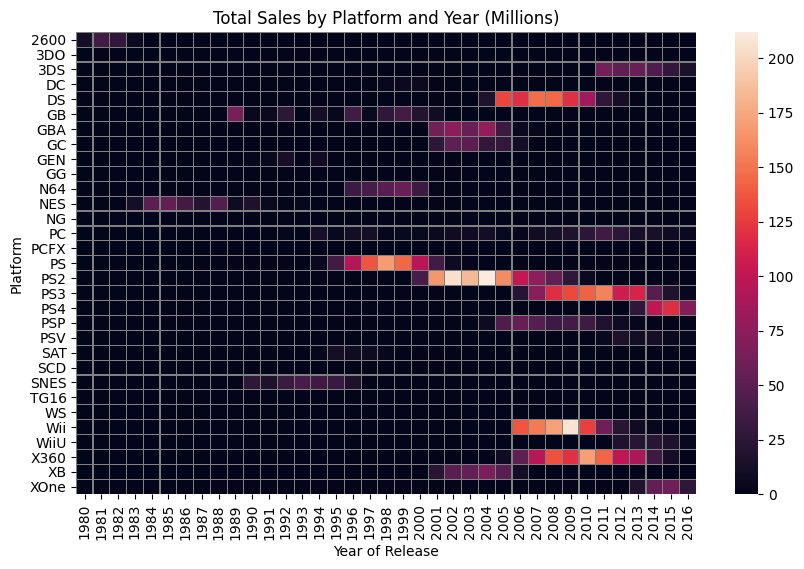

In [127]:
# Create a heatmap of platform sales over time
platform_year_pivot = df.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum'
).fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(platform_year_pivot, linecolor='gray', linewidths=0.1)

plt.title('Total Sales by Platform and Year (Millions)')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.show()

In [128]:
# Identify platforms with declining sales

We can see with this heat map that the older consels have fallen off and the main consles that are starting to decline are the Xbox 360(people are swiching to buy the Xbox one), PS3 (people swichjing to PS4), and the 3DS seams to have a bit of a lingering decline as well. 

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

**1.** Form this graph and the data shown we can see that the Playstaton platforms seem to be the most consistant with Xbox and also showing some consistancy in witht the xbox 360. The Wii also had a ery consistant few years from 2006 to arounnd 2013.

**2.** The platorm that has disaperd ar all the older ones, the older ones also dont have newrly as many sales as the ew cconslols. This comes to show that the purchas of gmaming devices is on the rise and has a growing popularity.

**3.** It seams the lifecycle of any given platform has a range of 4 to 7 years. There are of corese the outlires like those of PS2 which had a lifecycle of over 9 years and then the Game Boy that and off and on b=populatiry for many years but each sepert woudnlt be over about  years at a time.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [129]:
# Your code here to filter the dataset to relevant years
# Define the relevant years for modeling 2017
relevant_years = [2012, 2013, 2014, 2015, 2016]

# Filter the dataset
df_relevant = df[df['year_of_release'].isin(relevant_years)]

df_relevant['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

**1.** I chose the 5 years of 2012, 2013, 2014, 2015, and 2017 beacse it gives data on the popular consules at those times lifecicle and allows for easyer prodictions of 2017.

**2.** The curent market could be easaly compared becasuse we can assume that the curent year would fallow simular paterns.

**3.** The mane factures was i wanted to be able to include the data of the most popular platforms that where just starting ot grow in popularity (play station 4, xbox one) and how the predicesors to those droped off (PS3, Xbox360).

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [130]:
# Analyze platform sales trends
relevant_platform_sales = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [131]:
# Sort platforms by total sales
relevant_platforms_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

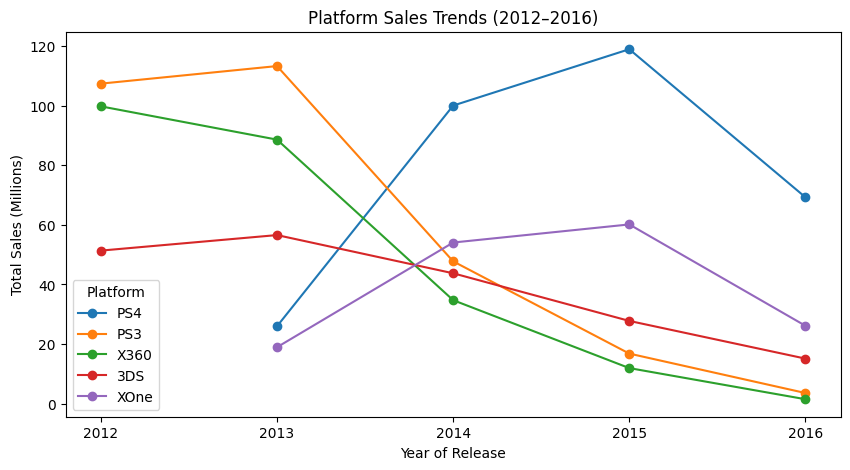

In [132]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
plt.figure(figsize=(10, 5))

for platform in relevant_platforms_sales:
    data = relevant_platform_sales[relevant_platform_sales['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=platform)

plt.title('Platform Sales Trends (2012–2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform')
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 1000x500 with 0 Axes>

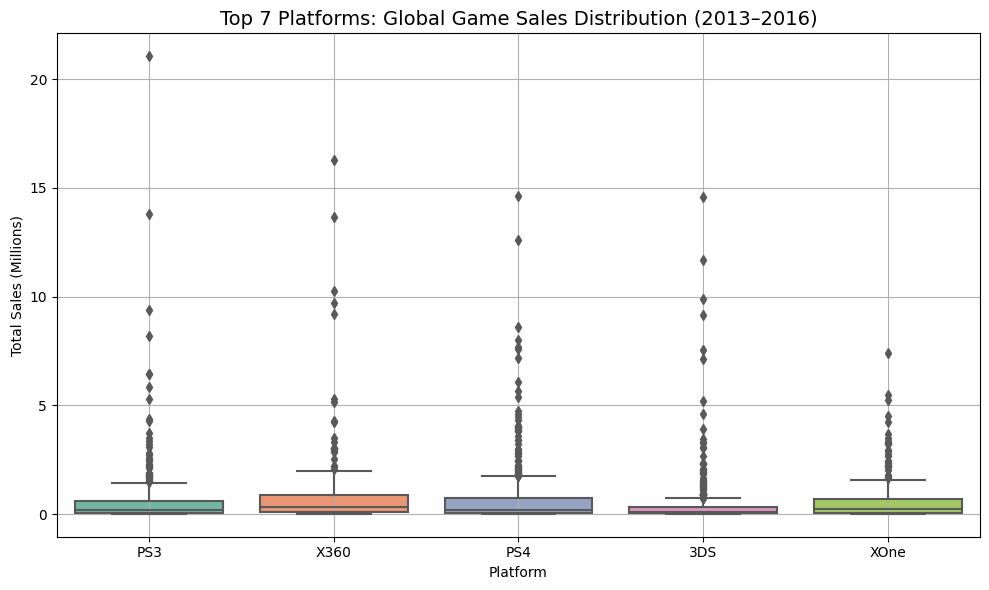

In [133]:
# Create box plot of sales by platform
plt.figure(figsize=(10, 5))

# Filter dataset to only those platforms
df_top_platforms = df_relevant[df_relevant['platform'].isin(relevant_platforms_sales)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_platforms, x='platform', y='total_sales', palette='Set2')
plt.title('Top 7 Platforms: Global Game Sales Distribution (2013–2016)', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
# Calculate detailed statistics for each platform
platform_stats = df_top_platforms.groupby('platform')['total_sales'].agg(
    game_count='count',
    total_sales='sum',
    average_sales='mean',
    median_sales='median',
    max_sales='max'
).round(2)

print(platform_stats)

          game_count  total_sales  average_sales  median_sales  max_sales
platform                                                                 
3DS              396       194.61           0.49          0.11      14.60
PS3              493       288.79           0.59          0.20      21.05
PS4              392       314.14           0.80          0.20      14.63
X360             292       236.54           0.81          0.31      16.27
XOne             247       159.32           0.65          0.22       7.39


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [135]:
# Choose a popular platform based on your previous analysis
# Filter data for Xbox One
xone_df = df_relevant[df_relevant['platform'] == 'XOne'].copy()

# get rid of missing scores
xone_df = xone_df.dropna(subset=['critic_score', 'user_score'])

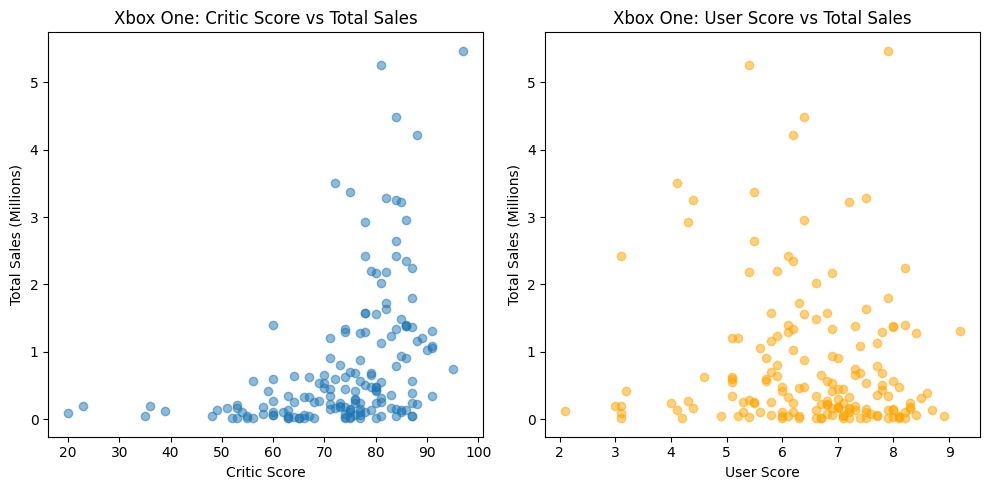

In [136]:
# Create scatter plots for both critic and user scores
plt.figure(figsize=(10, 5))

# Critic Score scatter plot
plt.subplot(1, 2, 1)
plt.scatter(xone_df['critic_score'], xone_df['total_sales'], alpha=0.5)
plt.title('Xbox One: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')

# User Score scatter plot
plt.subplot(1, 2, 2)
xone_df['user_score'] = pd.to_numeric(xone_df['user_score'], errors='coerce')
plt.scatter(xone_df['user_score'], xone_df['total_sales'], alpha=0.5, color='orange')
plt.title('Xbox One: User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [137]:
# Find games released on multiple platforms
multi_platform_titles = df_relevant['name'].value_counts()
multi_platform_titles = multi_platform_titles[multi_platform_titles > 1].index

# Filter dataset for those games
df_multi_platform = df_relevant[df_relevant['name'].isin(multi_platform_titles)]
df_multi_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unrated,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


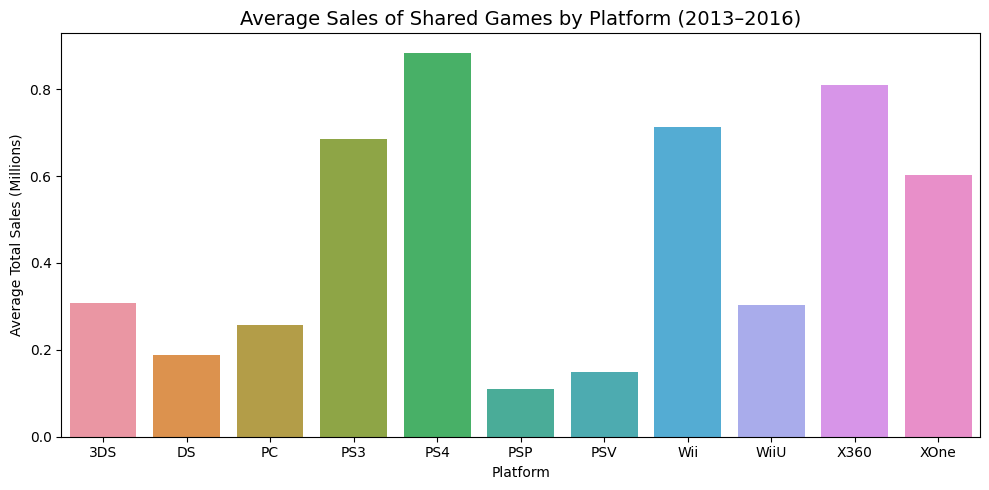

In [138]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
multi_platform_sales = df_multi_platform.groupby('platform')['total_sales'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=multi_platform_sales.index, y=multi_platform_sales.values)
plt.title('Average Sales of Shared Games by Platform (2013–2016)', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Average Total Sales (Millions)')
plt.tight_layout()
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [139]:
# Analyze genre performance
# Sort genres by total sales
genre_perf = df_relevant.groupby('genre')['total_sales'].agg(
    total_sales='sum',
    average_sales='mean',
    game_count='count'
).round(2)

genre_perf_sorted = genre_perf.sort_values(by='total_sales', ascending=False)
genre_perf_sorted

,total_sales,average_sales,game_count
genre,,,
Action,441.12,0.43,1031
Shooter,304.73,1.30,235
Role-Playing,192.80,0.52,370
Sports,181.07,0.68,268
Misc,85.04,0.44,192
Platform,61.00,0.72,85
Racing,53.50,0.47,115
Fighting,44.49,0.41,109
Simulation,35.12,0.44,80


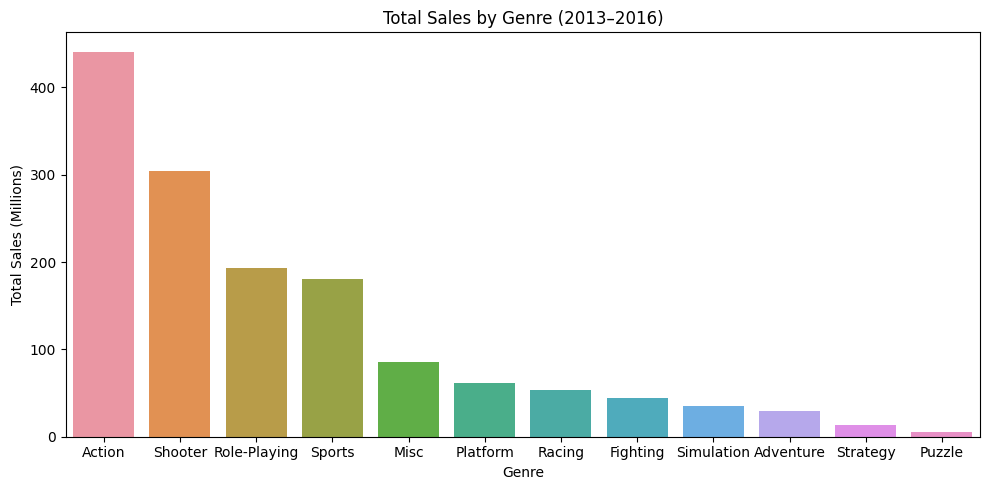

In [140]:
# Visualize genre distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_perf_sorted.index, y=genre_perf_sorted['total_sales'])
plt.title('Total Sales by Genre (2013–2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()

In [141]:
# Calculate market share for each genre
total_sales = genre_perf['total_sales'].sum()
genre_perf['market_share (%)'] = (genre_perf['total_sales'] / total_sales * 100).round(2)

# Sort and view
genre_perf.sort_values(by='market_share (%)', ascending=False)

,total_sales,average_sales,game_count,market_share (%)
genre,,,,
Action,441.12,0.43,1031,30.50
Shooter,304.73,1.30,235,21.07
Role-Playing,192.80,0.52,370,13.33
Sports,181.07,0.68,268,12.52
Misc,85.04,0.44,192,5.88
Platform,61.00,0.72,85,4.22
Racing,53.50,0.47,115,3.70
Fighting,44.49,0.41,109,3.08
Simulation,35.12,0.44,80,2.43


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

**1.** The action and shooter genres are performing the best by far with role playing and sports also peing very popular.

**2.** Again the action and shooter genres are on the gowing side and then the ones declining are those of statagy and adventure.

**3.** The best genres with the highest adverage sales are shooter, platform, and sports.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [142]:
# Function to analyze platform performance by region
def top_platforms_by_region(df, region_col, top_n=5):
    platform_sales = df.groupby('platform')[region_col].sum().sort_values(ascending=False).head(top_n)
    return platform_sales

In [143]:
# Analyze each region
top_na = top_platforms_by_region(df_relevant, 'na_sales')
print("Top Platforms North America:")
print(top_na)

# Top platforms in Europe
top_eu = top_platforms_by_region(df_relevant, 'eu_sales')
print("\nTop Platforms Europe:")
print(top_eu)

# Top platforms in Japan
top_jp = top_platforms_by_region(df_relevant, 'jp_sales')
print("\nTop Platforms Japan:")
print(top_jp)

Top Platforms North America:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Top Platforms Europe:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Top Platforms Japan:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [144]:
# Create a comparative platform analysis
# Group by platform and sum regional sales
regional_sales = df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Filter to top platforms by global sales
platforms = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

# Filter for only top platforms
regional_sales = regional_sales.loc[platforms]

# Preview
regional_sales

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
X360,140.05,74.52,1.57
3DS,55.31,42.64,87.79
XOne,93.12,51.59,0.34
WiiU,38.10,25.13,13.01
PC,19.12,37.76,0.00
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39


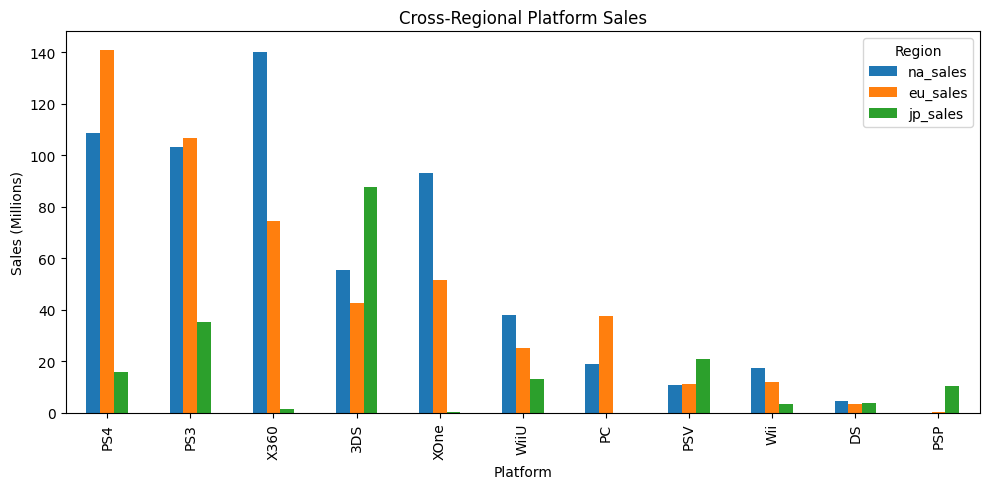

In [145]:
# Visualize cross-regional comparison for top platforms
regional_sales.plot(kind='bar', figsize=(10, 5))

plt.title('Cross-Regional Platform Sales')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [146]:
# Function to analyze genre performance by region
def genres_by_region(df, region_col):
    genre_sales = df.groupby('genre')[region_col].sum().sort_values(ascending=False)
    return genre_sales

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [147]:
# Create a comparative genre analysis
# Group by genre and sum
regional_genre_sales = df_relevant.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Preview
regional_genre_sales

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [148]:
# Function to analyze ESRB rating impact
def esrb_impact(df, region_col):
    esrb_sales = df.groupby('rating')[region_col].sum().sort_values(ascending=False)
    return esrb_sales

In [149]:
# Analyze ESRB impact for each region
# North America
na_esrb = esrb_impact(df_relevant, 'na_sales')
print("North America ESRB Impact:\n", na_esrb)

# Europe
eu_esrb = esrb_impact(df_relevant, 'eu_sales')
print("\nEurope ESRB Impact:\n", eu_esrb)

# Japan
jp_esrb = esrb_impact(df_relevant, 'jp_sales')
print("\nJapan ESRB Impact:\n", jp_esrb)

North America ESRB Impact:
 rating
M          231.57
E          114.37
Unrated    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

Europe ESRB Impact:
 rating
M          193.96
E          113.03
Unrated     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

Japan ESRB Impact:
 rating
Unrated    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


### Hypothesis 1: Xbox One vs PC User Ratings

- **Null Hypothesis:** The average user ratings for Xbox One and PC games are equal.
- **Alternative Hypothesis:** The average user ratings for Xbox One and PC games are different.

I chose to use an two-sample t-test assuming the groups may have different variances.

### Hypothesis 2: Action vs Sports Genres

- **Null Hypothesis:** The average user ratings for Action and Sports games are equal.
- **Alternative Hypothesis:** The average user ratings for Action and Sports games are different.

Again, an independent two-sample t-test for simular reasions.


In [150]:
## Hypothesis 1 ##

# Filter user scores for Xbox One and PC
xbox_ratings = df_relevant[(df_relevant['platform'] == 'XOne')]['user_score'].dropna()
pc_ratings = df_relevant[(df_relevant['platform'] == 'PC')]['user_score'].dropna()

# T-test
alpha = 0.05
t_stat1, p_val1 = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

print(f"Xbox vs PC — p-value: {p_val1}")
if p_val1 < alpha:
    print("Reject the null hypothesis: User ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings.")

Xbox vs PC — p-value: 0.5489537965134912
Fail to reject the null hypothesis: No significant difference in user ratings.


In [151]:
## Hypothesis 2 ##

# Filter user scores for Action and Sports genres
action_ratings = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

# t-test
alpha = 0.05
t_stat2, p_val2 = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print(f"Action vs Sports — p-value: {p_val2}")
if p_val2 < alpha:
    print("Reject the null hypothesis: User ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings.")

Action vs Sports — p-value: 4.24307776572644e-20
Reject the null hypothesis: User ratings are significantly different.


# Step 6. Write a general conclusion


### Final Conclusion:

Bassed off of all the tests we can see that the sales of boht video games and gameing platforms have been on the rize and show no signs of stoping. The top genres beng action,shooting, and sprots. The top platforms, being the PS3 and the Xbox 360 with the PS4 and XboxOne on the rise. We have many other answers to qestions that may help us when it comes to making predicitons about 2017. If I was planing on making a game in 2017 I would make a action shooter that would realse on the PS4 and Xbox One.